In [ ]:
import pandas as pd 

kospi1=pd.read_csv("/Users/jiwon/bdata/cscfiles/kosp_v1.csv")
snp1=pd.read_csv('/Users/jiwon/bdata/cscfiles/mergerd_snp_v2.csv')

In [2]:
snp1['Date']=pd.to_datetime(snp1['Date'])
kospi1['Date']=pd.to_datetime(kospi1['Date'])

In [3]:
snp=snp1.copy()
kospi=kospi1.copy()

In [4]:
# IQR 계산
Q1 = snp['Volume'].quantile(0.25)
Q3 = snp['Volume'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = snp[(snp['Volume'] < lower_bound) | (snp['Volume'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(snp)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1216
이상치 수: 88
이상치 비율: 7.24%


In [5]:
# IQR 계산
Q1 = kospi['Volume'].quantile(0.25)
Q3 = kospi['Volume'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 개수
outliers = kospi[(kospi['Volume'] < lower_bound) | (kospi['Volume'] > upper_bound)]
total_outliers = len(outliers)
total_data = len(kospi)
outlier_ratio = total_outliers / total_data

print(f"총 데이터 수: {total_data}")
print(f"이상치 수: {total_outliers}")
print(f"이상치 비율: {outlier_ratio:.2%}")


총 데이터 수: 1187
이상치 수: 53
이상치 비율: 4.47%


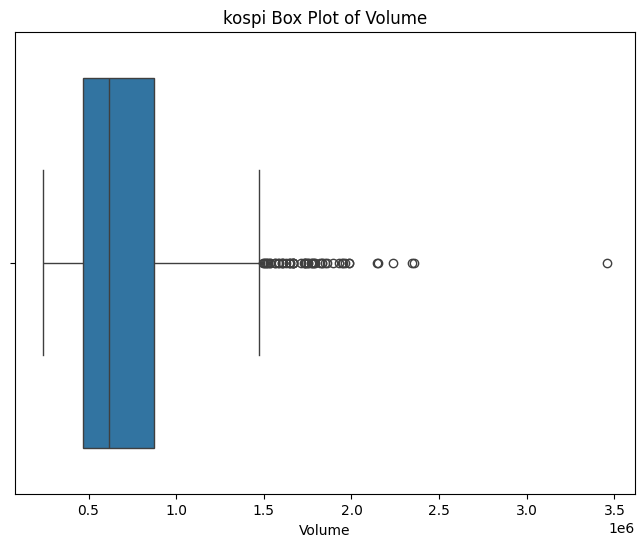

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x=kospi['Volume'])
plt.title("kospi Box Plot of Volume")
plt.show()

In [7]:
def conditional_probability(data, condition, target, condition_value, target_value):
    # Pandas 데이터프레임 처리
    if isinstance(data, pd.DataFrame):
        total = data[data[condition] == condition_value].shape[0]
        matching = data[(data[condition] == condition_value) & (data[target] == target_value)].shape[0]
    return matching/total if total > 0 else 0

In [8]:
prob_v3_r0=conditional_probability(snp,'Volume_Sector','ratio_change_sector',3,0)
prob_v3_r3=conditional_probability(snp,'Volume_Sector','ratio_change_sector',3,3)
prob_v3_r2=conditional_probability(snp,'Volume_Sector','ratio_change_sector',3,2)
prob_v3_r1=conditional_probability(snp,'Volume_Sector','ratio_change_sector',3,1)
prob_v3_r03=prob_v3_r0+prob_v3_r3
prob_v3_r12=prob_v3_r1+prob_v3_r2

print(f"S&P500 거래량이 많을때 변동률이 클 확률:{prob_v3_r03}")

S&P500 거래량이 많을때 변동률이 클 확률:0.7203947368421053


In [9]:
k_prob_v3_r0=conditional_probability(kospi,'Volume_Sector','ratio_change_sector',3,0)
k_prob_v3_r3=conditional_probability(kospi,'Volume_Sector','ratio_change_sector',3,3)
k_prob_v3_r2=conditional_probability(kospi,'Volume_Sector','ratio_change_sector',3,2)
k_prob_v3_r1=conditional_probability(kospi,'Volume_Sector','ratio_change_sector',3,1)
k_prob_v3_r03=k_prob_v3_r0+k_prob_v3_r3


print(f"Kospi 거래량이 많을때 변동률이 클 확률:{k_prob_v3_r03}")

Kospi 거래량이 많을때 변동률이 클 확률:0.5282485875706215


In [15]:
import numpy as np
def calculate_entropy(probs) :
    probs=np.array(probs)
    return -sum(probs*np.log2(probs))



In [31]:
probs_k=[k_prob_v3_r03,1-k_prob_v3_r03]
probs_s=[prob_v3_r03,1-prob_v3_r03]

ent_k=calculate_entropy(probs_k)
ent_s=calculate_entropy(probs_s)


print(f"kopsi 거래량에 의한 변동율의 엔트로피:{ent_k}")
print(f"S&P500 거래량에 의한 변동율의 엔트로피:{ent_s}")

kopsi 거래량에 의한 변동율의 엔트로피:0.9976962821673061
S&P500 거래량에 의한 변동율의 엔트로피:0.8549123962581853


In [ ]:
prob_r3_v3=conditional_probability(snp,'ratio_change_sector','Volume_Sector',3,3)
prob_r0_v3=conditional_probability(snp,'ratio_change_sector','Volume_Sector',0,3)
prob_r03_v3=prob_r0_v3+prob_r3_v3

print(f"S&P500 거래량이 많을때 변동률이 클 확률:{prob_r03_v3}")

S&P500 거래량이 많을때 변동률이 클 확률:0.7203947368421053


In [33]:
def calculate_corr(data,arr) :
    corr=data[arr].corr()
    return corr


pp=calculate_corr(kospi,['Volume','daily_change_ratio'])
print(pp)

                      Volume  daily_change_ratio
Volume              1.000000            0.004818
daily_change_ratio  0.004818            1.000000


In [54]:
tt=calculate_corr(snp,['RSI','Volume','daily_change_ratio'])
print(tt)

                         RSI    Volume  daily_change_ratio
RSI                 1.000000 -0.239759            0.194847
Volume             -0.239759  1.000000           -0.084501
daily_change_ratio  0.194847 -0.084501            1.000000
